In [2]:
import pandas as pd
import chardet 
import numpy as np

In [3]:
tips = pd.read_csv('C:\\Users\\vvoyt\\learning\\python-exercises\\9. Методы визуализации данных\\tips.csv') 

In [5]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [6]:
#11.2.1
#Сколько строк содержится в датафрейме без учёта заголовка?

len(tips)

244

In [8]:
#11.2.2
#Напишите максимальную сумму счёта в датафрейме. Ответ введите с точностью до двух цифр после запятой, например 100.55.

tips['total_bill'].max()
#df[(df.total_bill == df.total_bill.max())]

50.81

In [9]:
#Вывод графиков и диаграмм без использования дополнительных функций.
%matplotlib inline

<AxesSubplot:>

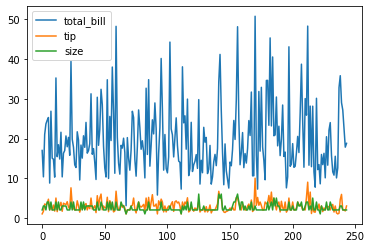

In [10]:
tips.plot()

<AxesSubplot:ylabel='Frequency'>

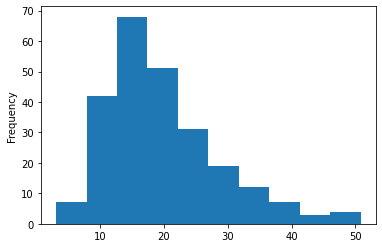

In [11]:
#Гистограмма распределения признака
tips['total_bill'].plot(kind = 'hist')

<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>

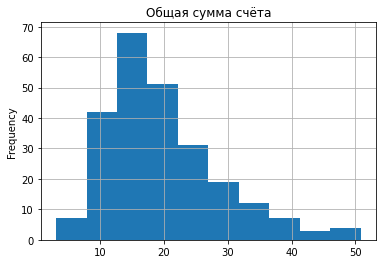

In [12]:
#Добавление параметров grid и title
tips['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

<AxesSubplot:title={'center':'Количество посетителей по дням'}>

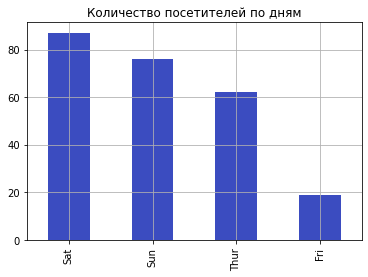

In [13]:
tips['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

<AxesSubplot:xlabel='sex,smoker'>

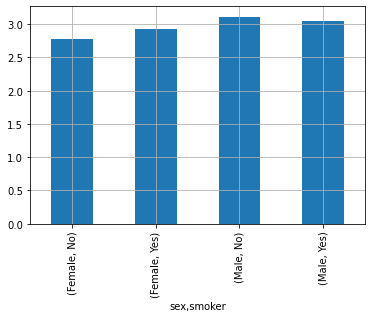

In [16]:
tips.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True) 

array([<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

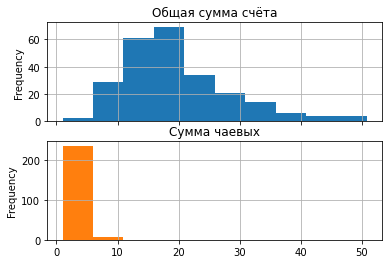

In [18]:
tips[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

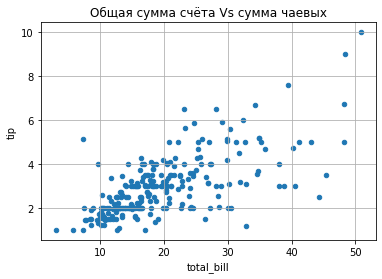

In [20]:
tips.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

<AxesSubplot:xlabel='day'>

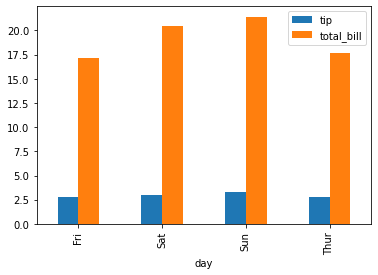

In [21]:
tips.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

<AxesSubplot:xlabel='sex,smoker'>

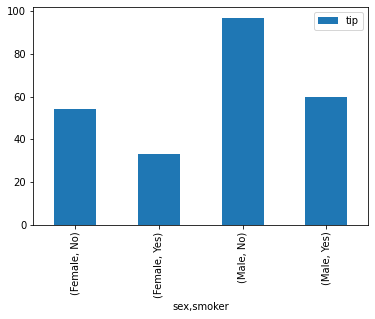

In [26]:
#11.4.1
#Какой заголовок лучше подойдет для диаграммы, созданной с помощью этого кода?

tips.pivot_table(values = 'tip', 
                 index = ['sex', 'smoker'], 
                 aggfunc = 'count').plot(kind = 'bar')
#распределение клиентов ресторана, оставляющих чаевые, по полу и отношению к курению

<AxesSubplot:ylabel='smoker'>

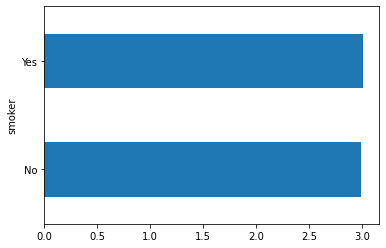

In [28]:
#11.4.2
#Какой вариант кода лучше всего подходит для построения графика,
    #отображающего среднюю сумму чаевых, которые оставляют курящие и некурящие посетители?

tips.groupby('smoker')['tip'].mean().plot(kind = 'barh') 

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:\\Users\\vvoyt\\learning\\Skillfactory trainee\\Module B\\data\\tips.csv') 

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

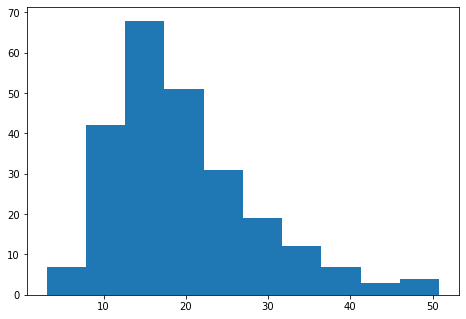

In [33]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5, 0, 'Сумма заказа, USD')

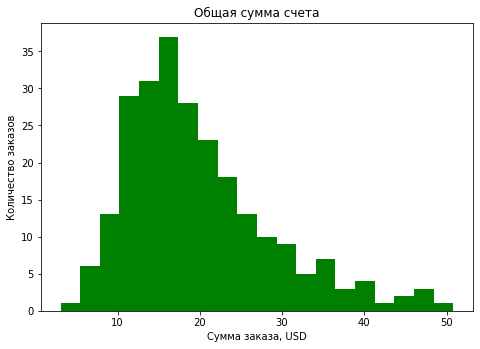

In [36]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

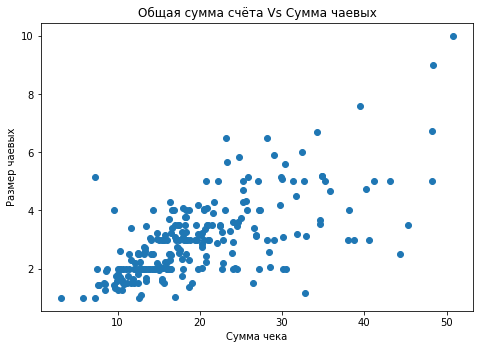

In [37]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

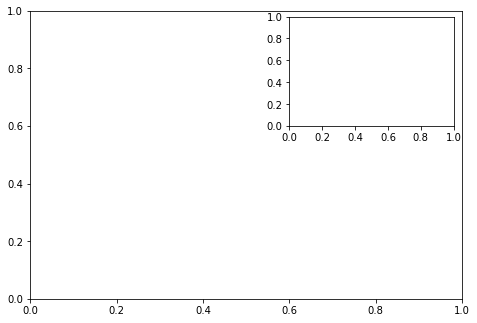

In [38]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

In [39]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

<BarContainer object of 4 artists>

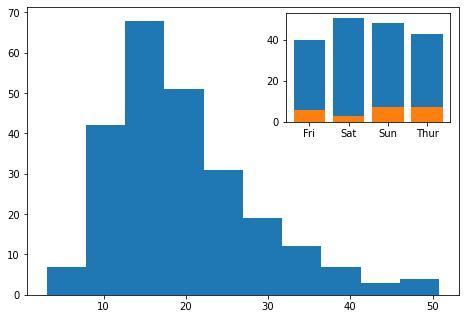

In [40]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

<BarContainer object of 4 artists>

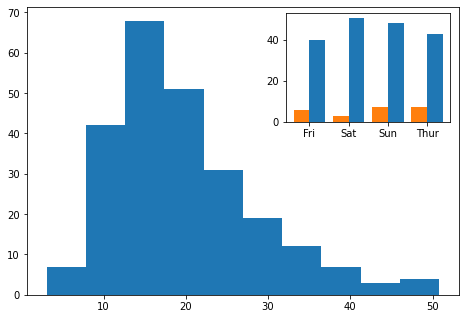

In [41]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge')

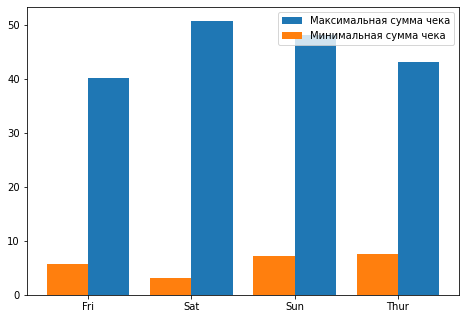

In [42]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
         width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
         width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

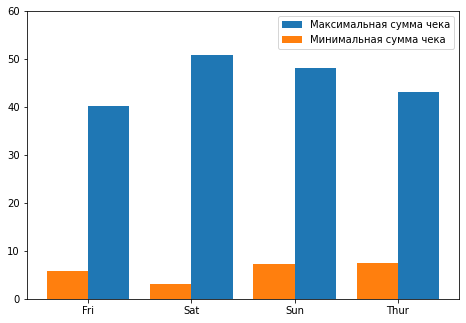

In [44]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], width = 0.4, align = 'edge', label = "Максимальная сумма чека")
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], width = -0.4, align = 'edge', label = "Минимальная сумма чека")
axes.legend(loc = 1)

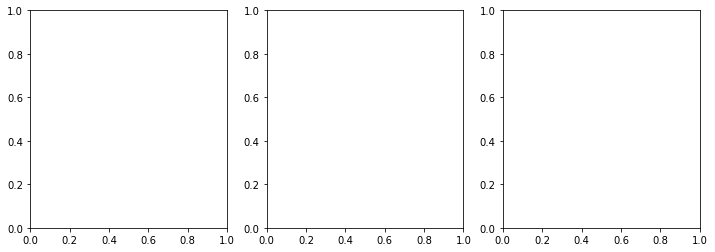

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

Text(0.5, 1.0, 'Общая сумма счёта Vs Cумма чаевых')

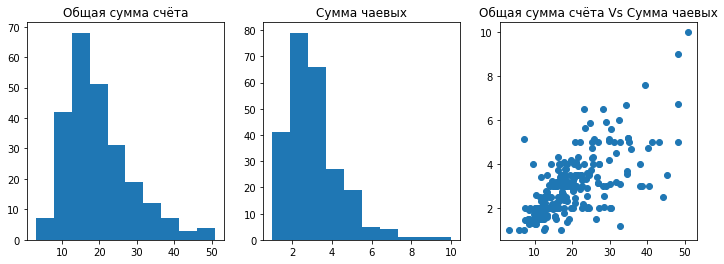

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счёта')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes[2].set_title('Общая сумма счёта Vs Cумма чаевых')

In [47]:
import numpy as np 
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

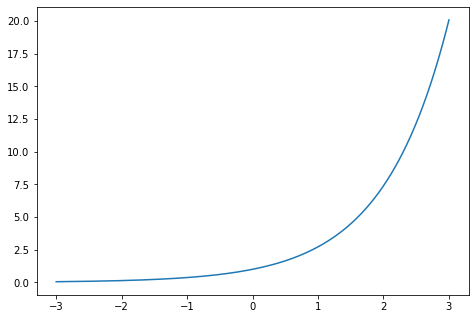

In [48]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

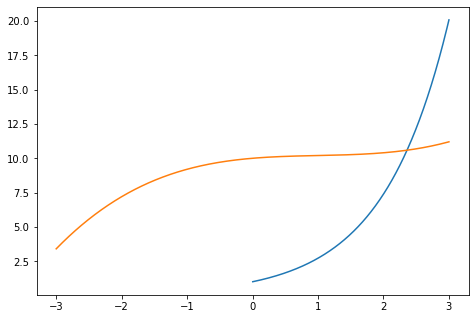

In [49]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

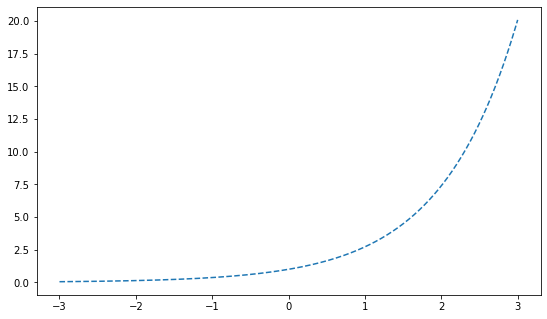

In [50]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

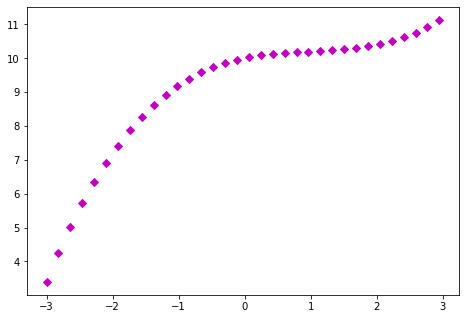

In [51]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

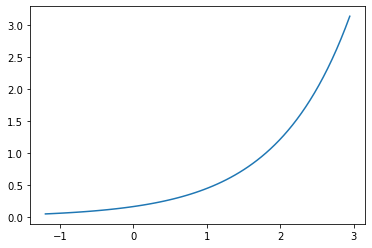

In [56]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)
#plt.plot(x[500::100], y1[500::100])
#plt.plot(x[300:], y1[:700])
plt.plot(x[300::10], y1[:700:10])

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

In [59]:
df = pd.read_csv('C:\\Users\\vvoyt\\learning\\Skillfactory trainee\\Module B\\data\\tips.csv') 

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

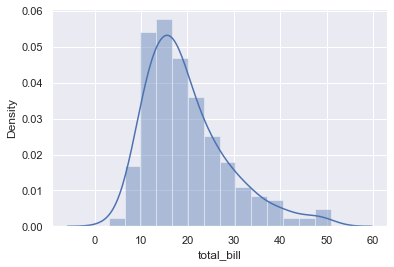

In [60]:
sns.set()
sns.distplot(df['total_bill'])

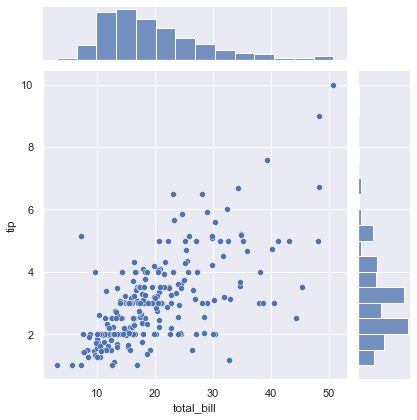

In [61]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

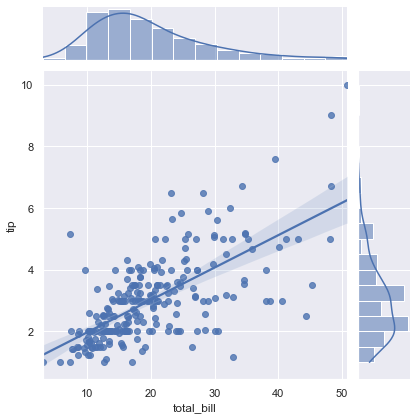

In [62]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

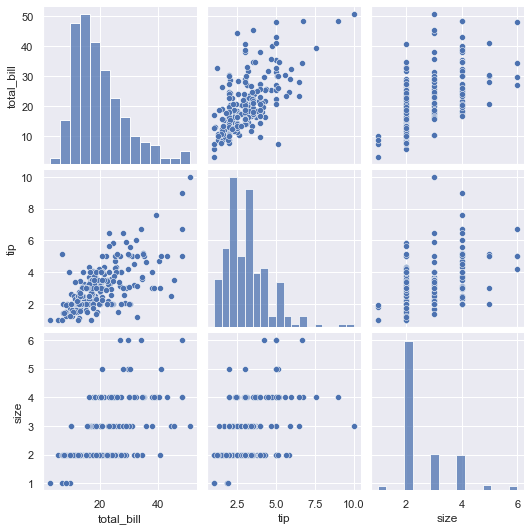

In [63]:
sns.pairplot(df)

<AxesSubplot:xlabel='day', ylabel='count'>

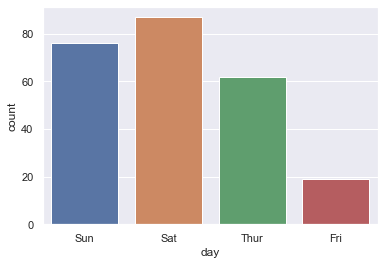

In [64]:
sns.countplot(x = 'day', data = df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

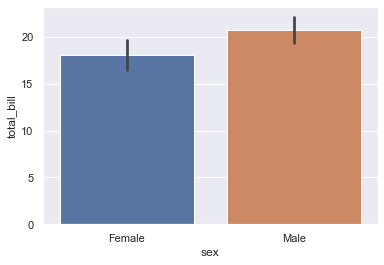

In [65]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

<AxesSubplot:xlabel='day', ylabel='tip'>

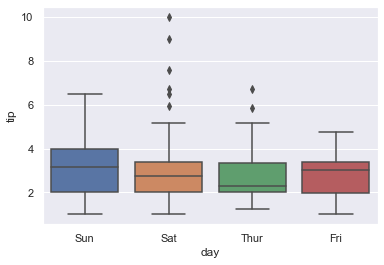

In [66]:
sns.boxplot(x = 'day', y = 'tip', data = df)

<AxesSubplot:xlabel='day', ylabel='tip'>

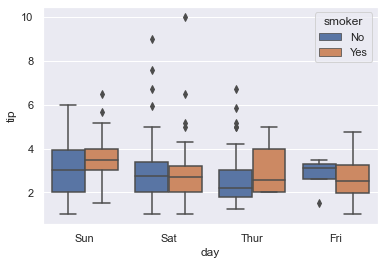

In [67]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

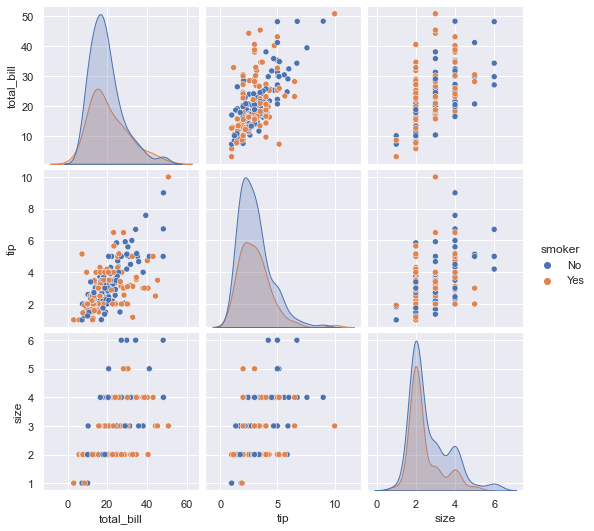

In [69]:
sns.pairplot(df, hue = 'smoker')

In [70]:
correlation = df.corr()

<AxesSubplot:>

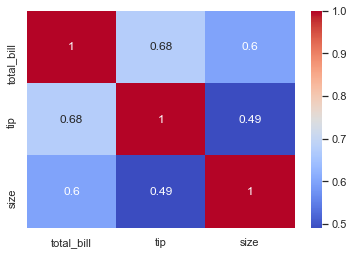

In [71]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')